In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from pmdarima import plot_acf, plot_pacf

%matplotlib inline

In [2]:
data = pd.read_csv('Time_series/sp500_index.csv')
data.head()

,Date,S&P500
0,2014-10-17,1886.76
1,2014-10-20,1904.01
2,2014-10-21,1941.28
3,2014-10-22,1927.11
4,2014-10-23,1950.82


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#data = data[(data['Date'].dt.year >= 2020) & (data['Date'].dt.year <= 2024)]

In [3]:
print(data.shape)
print(data.dtypes)

(2516, 2)
Date       object
S&P500    float64
dtype: object


In [5]:
data.isnull().values.any()

False

In [6]:
data.head()

,S&P500
Date,
2014-10-17,1886.76
2014-10-20,1904.01
2014-10-21,1941.28
2014-10-22,1927.11
2014-10-23,1950.82


In [7]:
data.describe()

,S&P500
count,2516.000000
mean,3275.335537
std,1032.744674
min,1829.080000
25%,2373.470000
50%,2945.495000
75%,4154.607500
max,5859.850000


##### Aggregazione per mese

In [8]:
import pandas as pd

# Raggruppiamo per anno e mese calcolando la varianza
monthly_variances = data['S&P500'].resample('M').var()

# Creiamo il nuovo dataframe con anno, mese e varianza
varianze = pd.DataFrame({
    'Anno': monthly_variances.index.year,
    'Mese': monthly_variances.index.month,
    'Varianza': monthly_variances.values
})

# Mostriamo il dataframe
varianze.head(20)

C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_1616\2034169510.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_variances = data['S&P500'].resample('M').var()


,Anno,Mese,Varianza
0,2014,10,1556.020616
1,2014,11,314.308962
2,2014,12,1115.214786
3,2015,1,483.751277
4,2015,2,848.692626
5,2015,3,490.242290
6,2015,4,255.539761
7,2015,5,226.714477
8,2015,6,314.295815
9,2015,7,564.612034


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Raggruppiamo i dati per mese calcolando la media di "S&P500"
monthly_data = data['S&P500'].resample('M').mean()

monthly_data = monthly_data.reset_index()
monthly_data.rename(columns={'index': 'Date', 'S&P500': 'S&P500'}, inplace=True)

C:\Users\gians_ji5genm\AppData\Local\Temp\ipykernel_1616\4069625686.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['S&P500'].resample('M').mean()


In [10]:
monthly_data.head()

,Date,S&P500
0,2014-10-31,1956.021818
1,2014-11-30,2044.572105
2,2014-12-31,2054.266364
3,2015-01-31,2028.178500
4,2015-02-28,2082.195789


In [17]:
monthly_data.to_csv("Time_series/sp500_monthly.csv")

### Exploratory Data Analysis

Abbiamo osservato che nel 2020 c'è un forte picco verso il basso che altera la tendenza nei dati. Analizziamo successivamente in dettaglio cosa succede

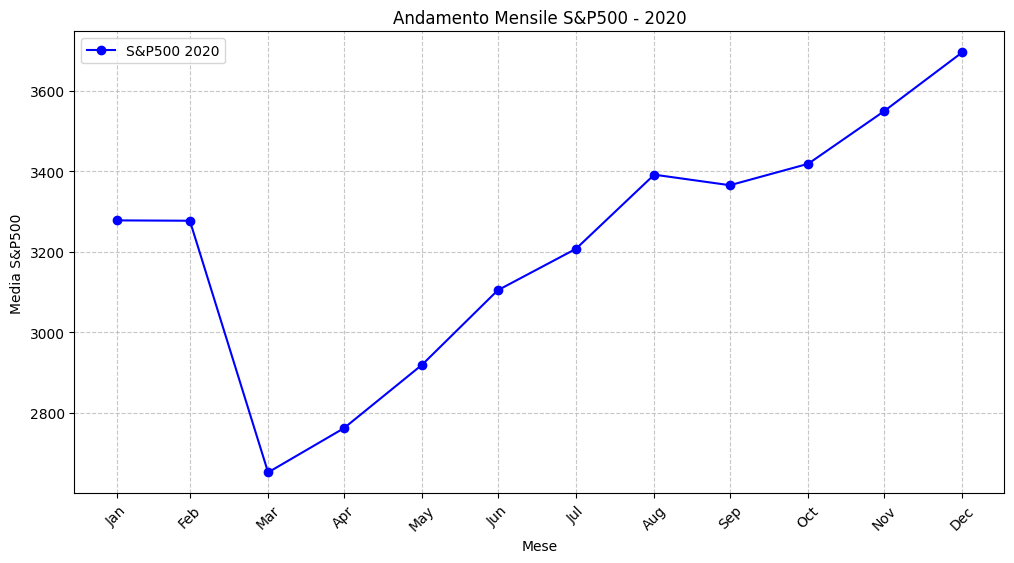

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtriamo i dati per il 2020
data_2020 = monthly_data[monthly_data['Date'].dt.year == 2020]

# Creiamo il grafico
plt.figure(figsize=(12, 6))
plt.plot(data_2020['Date'], data_2020['S&P500'], marker='o', linestyle='-', color='blue', label='S&P500 2020')

# Titolo e etichette
plt.title('Andamento Mensile S&P500 - 2020')
plt.xlabel('Mese')
plt.ylabel('Media S&P500')

# Aggiungiamo la griglia e la legenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Mostriamo i nomi dei mesi sull'asse X
plt.xticks(data_2020['Date'], data_2020['Date'].dt.strftime('%b'), rotation=45)

# Visualizziamo il grafico
plt.show()


Si può notare che il grande picco verso il basso si può ricollegare all'inizio del COVID, nei mesi di marzo aprile 2020. Successivamente si nota una graduale ripresa

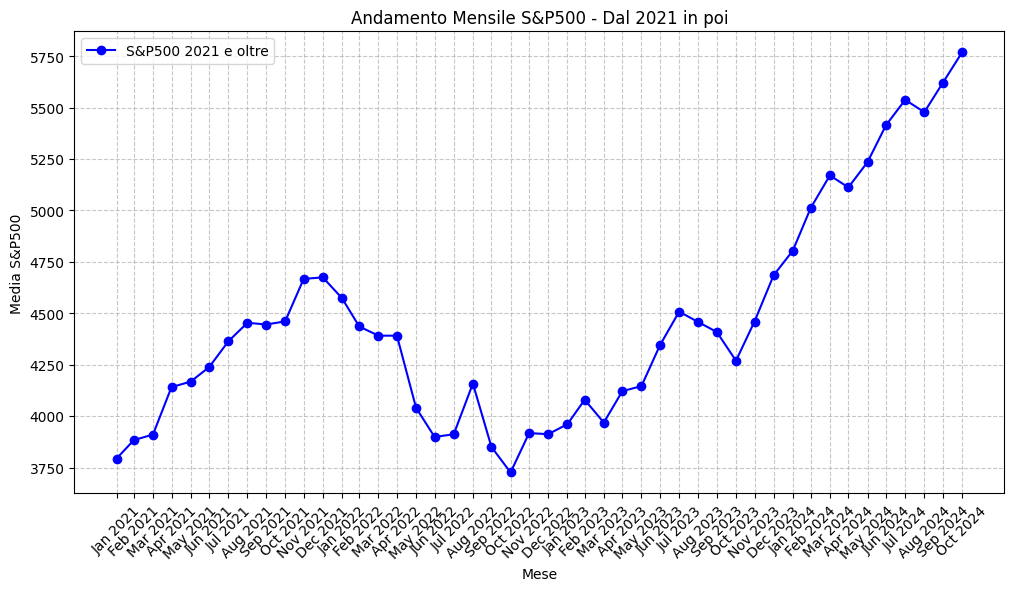

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtriamo i dati dal 2021 in poi
data_2021_onwards = monthly_data[monthly_data['Date'].dt.year >= 2021]

# Creiamo il grafico
plt.figure(figsize=(12, 6))
plt.plot(data_2021_onwards['Date'], data_2021_onwards['S&P500'], marker='o', linestyle='-', color='blue', label='S&P500 2021 e oltre')

# Titolo e etichette
plt.title('Andamento Mensile S&P500 - Dal 2021 in poi')
plt.xlabel('Mese')
plt.ylabel('Media S&P500')

# Aggiungiamo la griglia e la legenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Mostriamo i nomi dei mesi sull'asse X
plt.xticks(data_2021_onwards['Date'], data_2021_onwards['Date'].dt.strftime('%b %Y'), rotation=45)

# Visualizziamo il grafico
plt.show()


un altro momento di picco verso il basso si ha ad inizio 2022 fino al 2023, ricollegabile alla difficile situazione geopolitica tra russia e ucraina

Stagionalità di 13 mesi e trend mediamente positivo. Il fatto che a tratti il trend sia negativo credo possa dipendere dagli anni del covid e della guerra Ucraina-Russia, ma questa è solo una supposizione basata sul grafico corrente(STL) e sui 2 precedenti.

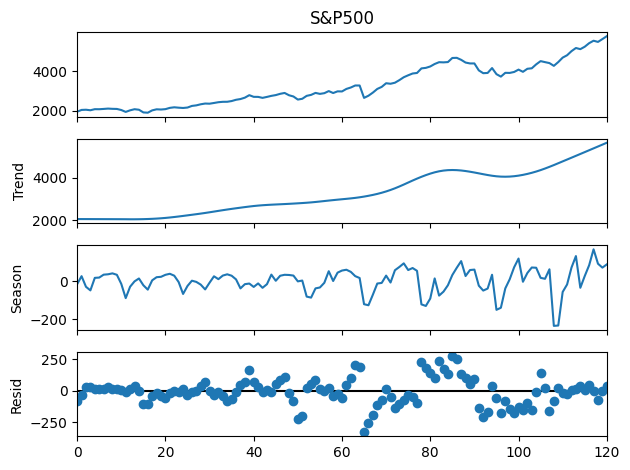

In [18]:
from statsmodels.tsa.seasonal import STL

# Eseguiamo la decomposizione STL
stl = STL(monthly_data['S&P500'], period=13)
result = stl.fit()

res = stl.fit()
fig = res.plot()


#### Suddivisione dataset training-test 80/20

In [19]:
import pandas as pd

# Ordiniamo il DataFrame per la colonna Date
df_data = monthly_data.sort_values(by='Date')

# Troviamo la data di cutoff per gli ultimi 2 anni
cutoff_date = df_data['Date'].max() - pd.Timedelta(days=2*365)

# Creaiamo il DataFrame train (tutti i dati precedenti a cutoff_date) e test (ultimi 2 anni)
train_data = df_data[df_data['Date'] <= cutoff_date]
test_data = df_data[df_data['Date'] > cutoff_date]

# Stampa o verifica i DataFrame
print("Train DataFrame:")
print(train_data.head())

print("\nTest DataFrame:")
print(test_data.head())

print(f"Lunghezza test: {len(test_data)}")
print(f"Lunghezza train: {len(train_data)}")
print(f"Lunghezza totale: {len(df_data)}")


Train DataFrame:
        Date       S&P500
0 2014-10-31  1956.021818
1 2014-11-30  2044.572105
2 2014-12-31  2054.266364
3 2015-01-31  2028.178500
4 2015-02-28  2082.195789

Test DataFrame:
          Date       S&P500
97  2022-11-30  3917.488571
98  2022-12-31  3912.380952
99  2023-01-31  3960.656500
100 2023-02-28  4079.684737
101 2023-03-31  3968.559130
Lunghezza test: 24
Lunghezza train: 97
Lunghezza totale: 121


## Forecasting

### Stationarity

In [20]:
def test_stationarity(ts):
    stats = ['Test Statistic', 'p-value']
    # Applicazione del test di Dickey-Fuller aumentato
    df_test = adfuller(ts.dropna())
    df_results = pd.Series(df_test[0:2], index=stats)
    
    print('ADF statistic:', df_results.iloc[0])
    print('P-value:', df_results.iloc[1])
    
    if df_results.iloc[1] <= 0.05:
        print("La serie è stazionaria (rifiutiamo H0).")
    else:
        print("La serie non è stazionaria (non rifiutiamo H0).")

In [21]:
test_stationarity(train_data['S&P500'])

ADF statistic: -0.8707938047474065
P-value: 0.7974382473193207
La serie non è stazionaria (non rifiutiamo H0).


Un valore p così elevato indica che non hai evidenza sufficiente per rifiutare l'ipotesi nulla (H₀), che afferma che la serie non è stazionaria. Quindi serie non stazionaria (media, varianza o covarianza variano nel tempo). Per renderla stazonaria applicare una differenziazione.

In [22]:
train_data['S&P500_diff'] = train_data['S&P500'].diff()
train_data['S&P500_diff'].head()

/var/folders/wz/z6163tcs0v11556rglm8m09h0000gn/T/ipykernel_44349/693865438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['S&P500_diff'] = train_data['S&P500'].diff()


0          NaN
1    88.550287
2     9.694258
3   -26.087864
4    54.017289
Name: S&P500_diff, dtype: float64

In [23]:
test_stationarity(train_data['S&P500_diff'])

ADF statistic: -8.49995326838425
P-value: 1.246080725563751e-13
La serie è stazionaria (rifiutiamo H0).


Questo valore di ADF è ora molto negativo, il che suggerisce una forte evidenza contro l'ipotesi nulla (H₀). Un p-value così basso conferma che possiamo rifiutare l'ipotesi nulla (H₀) con grande confidenza. Concludiamo quindi che la serie è stazionaria dopo la differenziazione.

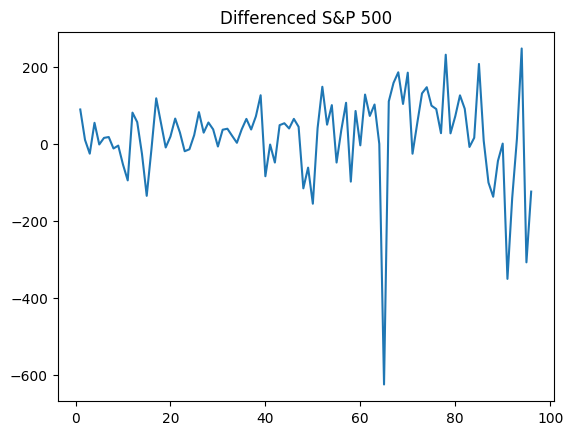

In [24]:
import matplotlib.pyplot as plt
train_data['S&P500_diff'].dropna().plot(title="Differenced S&P 500")
plt.show()

### ACF and PACF graphs

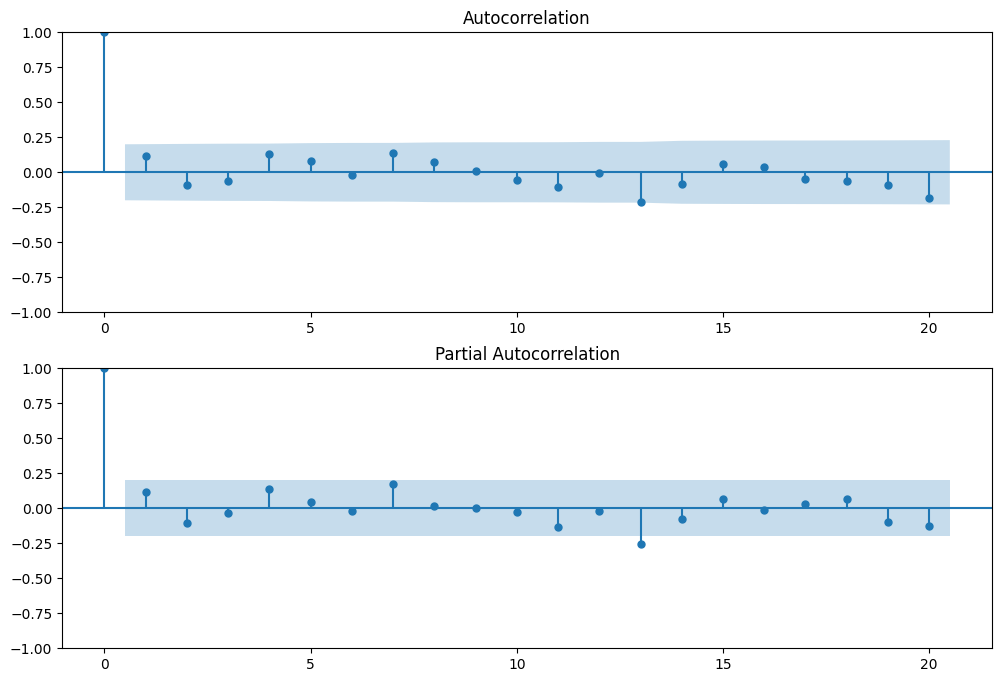

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_data['S&P500_diff'][1:],  ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_data['S&P500_diff'][1:], ax=ax2)

In [26]:
train_data_dropped = train_data.drop('S&P500', axis=1)
train_data_dropped.describe()

,Date,S&P500_diff
count,97,96.000000
mean,2018-10-30 13:21:38.969072128,18.437803
min,2014-10-31 00:00:00,-624.920574
25%,2016-10-31 00:00:00,-13.039746
50%,2018-10-31 00:00:00,32.020132
75%,2020-10-31 00:00:00,80.718593
max,2022-10-31 00:00:00,246.833543
std,NaN,116.421267


In [27]:
test_stationarity(train_data_dropped['S&P500_diff'])

ADF statistic: -8.49995326838425
P-value: 1.246080725563751e-13
La serie è stazionaria (rifiutiamo H0).


In [28]:
train_data_dropped = train_data_dropped.dropna(subset=['S&P500_diff'])

print("\nDataFrame dopo aver eliminato le righe con 'Col1' nullo:")
print(train_data_dropped)


DataFrame dopo aver eliminato le righe con 'Col1' nullo:
         Date  S&P500_diff
1  2014-11-30    88.550287
2  2014-12-31     9.694258
3  2015-01-31   -26.087864
4  2015-02-28    54.017289
5  2015-03-31    -2.205335
..        ...          ...
92 2022-06-30  -141.413333
93 2022-07-31    12.782833
94 2022-08-31   246.833543
95 2022-09-30  -308.042567
96 2022-10-31  -124.469524

[96 rows x 2 columns]


### ARIMA(0,0,0)

c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\gians_ji5genm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            S&P500_diff   No. Observations:                   96
Model:                          ARIMA   Log Likelihood                -592.408
Date:                Wed, 27 Nov 2024   AIC                           1188.816
Time:                        15:30:25   BIC                           1193.945
Sample:                             0   HQIC                          1190.889
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.4378     15.450      1.193      0.233     -11.843      48.719
sigma2      1.342e+04   1057.555     12.688      0.000    1.13e+04    1.55e+04
Ljung-Box (L1) (Q):                   1.37   Jarque-

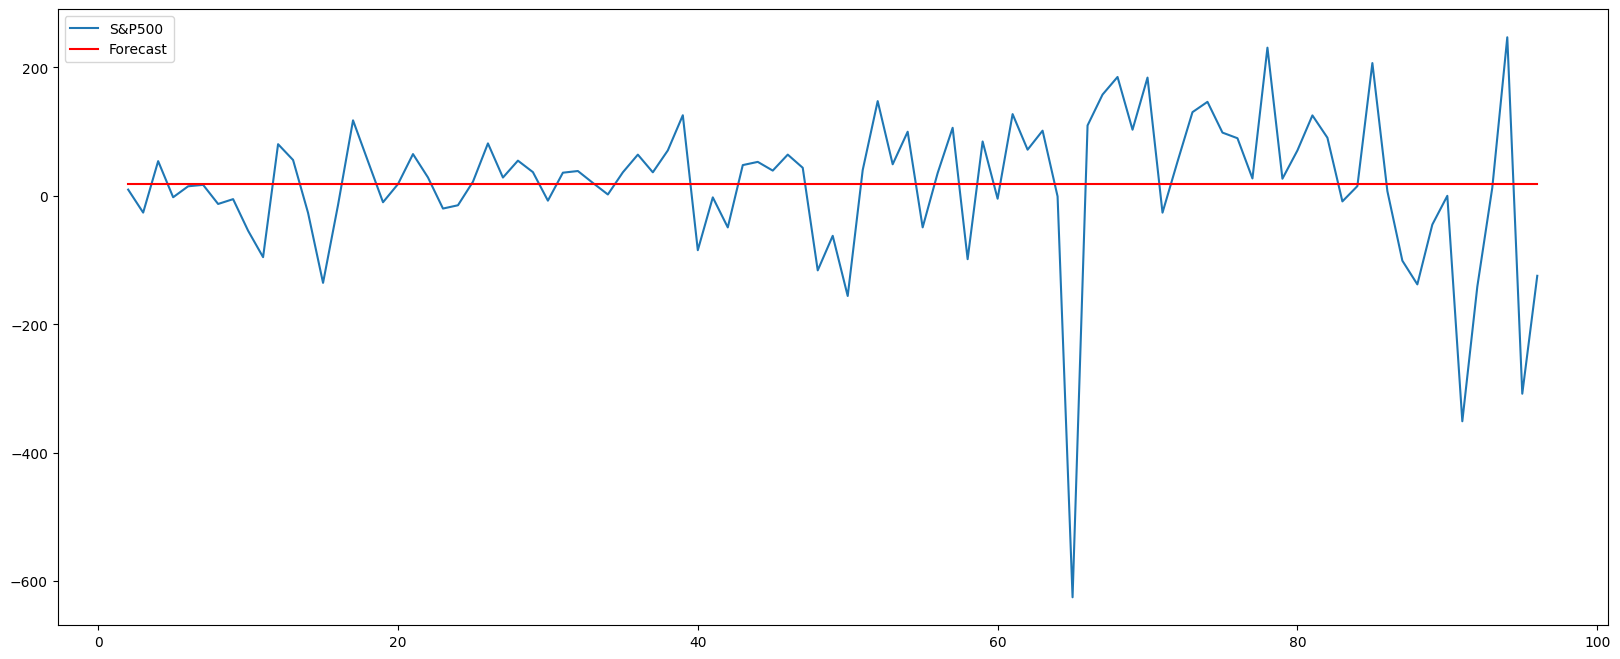

In [42]:
# Fit del modello SARIMA con i parametri trovati da auto_arima
model = ARIMA(train_data_dropped['S&P500_diff'], order=(0,0,0))
results_base = model.fit()

# Visualizza il grafico
fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(train_data_dropped['S&P500_diff'][1:])
plt.plot(results_base.fittedvalues[1:], color='red')
ax.legend(['S&P500', 'Forecast'])

# Mostra il sommario dei risultati
print(results_base.summary())

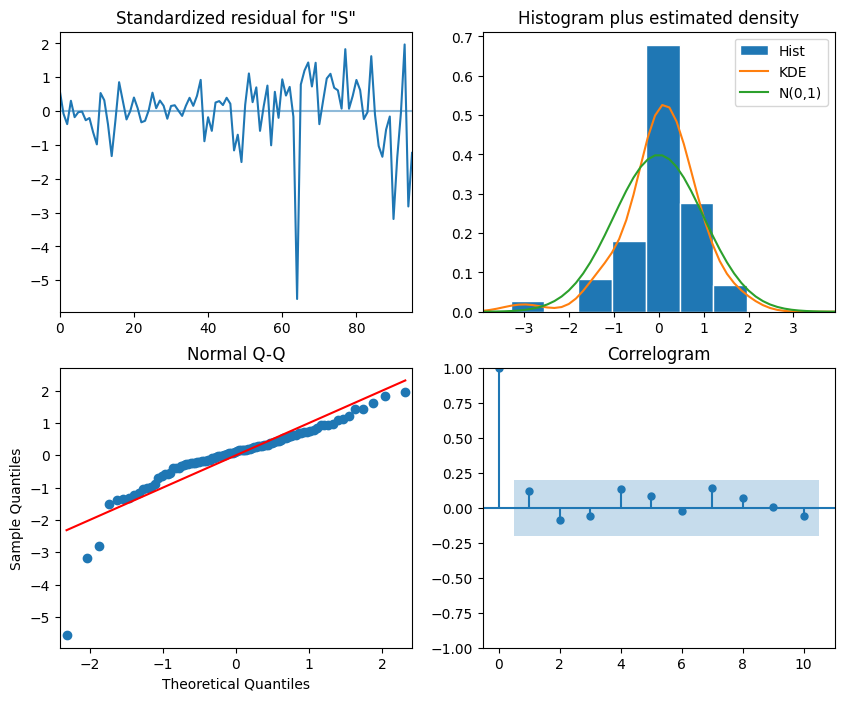

In [43]:
results_base.plot_diagnostics(figsize=(10, 8))
plt.show()

#### Test di Ljun-Box sui residui

In [47]:
# Test di Ljung-Box sui residui
residui = results_base.resid
lb_test = acorr_ljungbox(residui, lags=[10, 20, 30], return_df=True)
print("Risultati del test di Ljung-Box:")
print(lb_test)

Risultati del test di Ljung-Box:
      lb_stat  lb_pvalue
10   7.933500   0.635333
20  21.353837   0.376575
30  32.223086   0.357225


### AutoArima

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

# Trova automaticamente il miglior modello SARIMA con auto_arima
model = auto_arima(train_data_dropped['S&P500_diff'], seasonal=True,m=13, stepwise=True, trace=True)

# Stampa i parametri del miglior modello trovato
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[13] intercept   : AIC=1192.746, Time=2.08 sec
 ARIMA(0,0,0)(0,0,0)[13] intercept   : AIC=1190.681, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[13] intercept   : AIC=1188.604, Time=0.40 sec
 ARIMA(0,0,1)(0,0,1)[13] intercept   : AIC=1189.095, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[13]             : AIC=1191.285, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[13] intercept   : AIC=1191.762, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[13] intercept   : AIC=1190.186, Time=0.62 sec
 ARIMA(1,0,0)(1,0,1)[13] intercept   : AIC=1190.154, Time=0.20 sec
 ARIMA(1,0,0)(0,0,1)[13] intercept   : AIC=1189.397, Time=0.13 sec
 ARIMA(1,0,0)(2,0,1)[13] intercept   : AIC=1192.139, Time=0.84 sec
 ARIMA(0,0,0)(1,0,0)[13] intercept   : AIC=1187.286, Time=0.38 sec
 ARIMA(0,0,0)(2,0,0)[13] intercept   : AIC=1188.902, Time=0.35 sec
 ARIMA(0,0,0)(1,0,1)[13] intercept   : AIC=1188.889, Time=0.14 sec
 ARIMA(0,0,0)(0,0,1)[13] intercept   : AIC=1188.110, Time=0.05 sec
 ARIMA(0,0,0)(2,0,1

### ARIMA(2,0,2)(1,0,1,13)

/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/statsmodels/base/

                                     SARIMAX Results                                      
Dep. Variable:                        S&P500_diff   No. Observations:                   96
Model:             ARIMA(2, 0, 2)x(1, 0, [1], 13)   Log Likelihood                -587.379
Date:                            Mon, 02 Dec 2024   AIC                           1190.758
Time:                                    12:41:48   BIC                           1211.273
Sample:                                         0   HQIC                          1199.051
                                             - 96                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1174     15.545      1.230      0.219     -11.351      49.586
ar.L1         -0.1367      0.128   

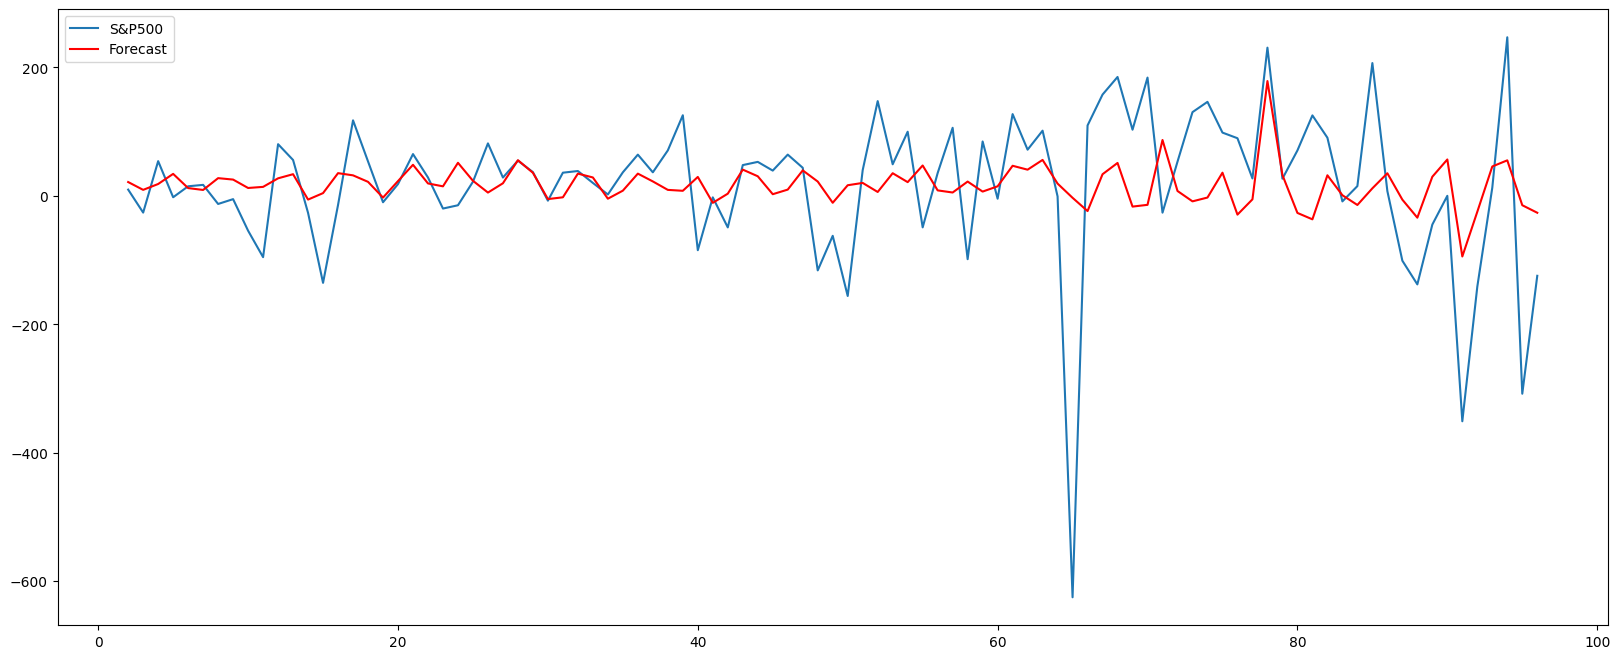

In [29]:
# Fit del modello SARIMA con i parametri trovati da auto_arima
model = ARIMA(train_data_dropped['S&P500_diff'], order=(2,0,2), seasonal_order=(1,0,1,13))
results = model.fit()

# Visualizza il grafico
fig = plt.figure(figsize=(20,8))
ax = plt.gca()
plt.plot(train_data_dropped['S&P500_diff'][1:])
plt.plot(results.fittedvalues[1:], color='red')
ax.legend(['S&P500', 'Forecast'])

# Mostra il sommario dei risultati
print(results.summary())

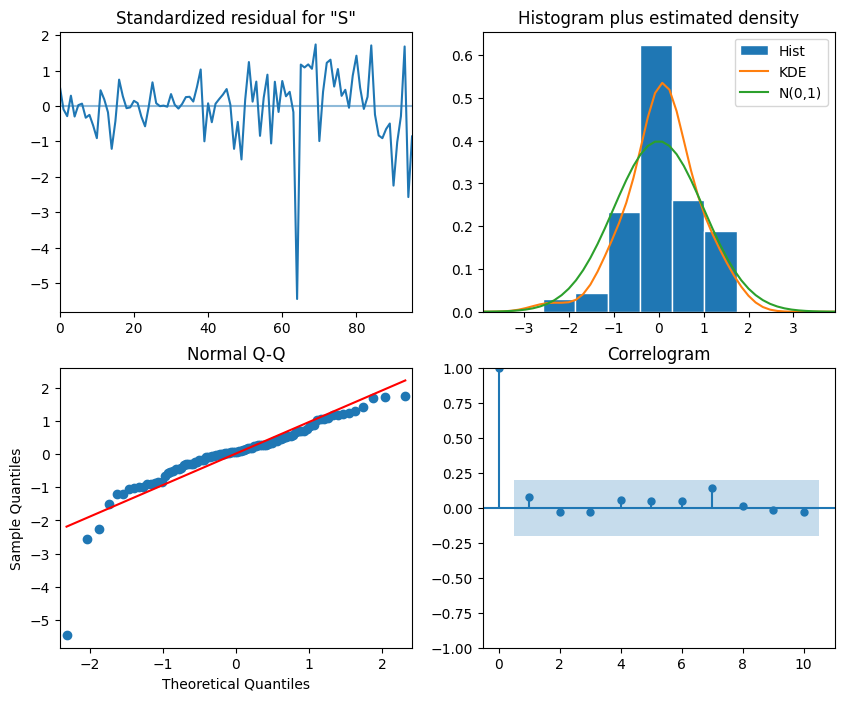

In [31]:
results.plot_diagnostics(figsize=(10, 8))
plt.show()

#### Test && Metriche

/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


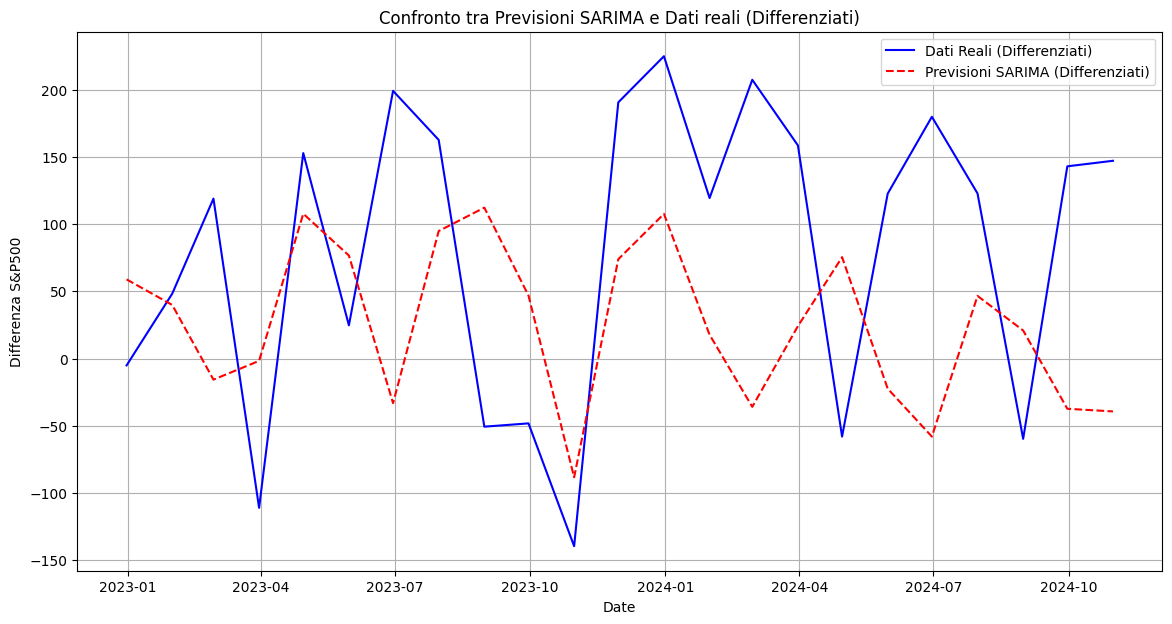

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Fare la previsione con il modello SARIMAX
predictions = results.get_forecast(steps=len(test_data['S&P500_diff']))
y_pred = predictions.predicted_mean

y_pred.index = test_data['Date']
y_true = test_data['S&P500_diff']
y_true.index = test_data['Date']

# Creazione del grafico
plt.figure(figsize=(14, 7))
plt.plot(y_true, label='Dati Reali (Differenziati)', color='blue')
plt.plot(y_pred, label='Previsioni SARIMA (Differenziati)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Differenza S&P500')
plt.title('Confronto tra Previsioni SARIMA e Dati reali (Differenziati)')
plt.legend()
plt.grid(True)
plt.show()

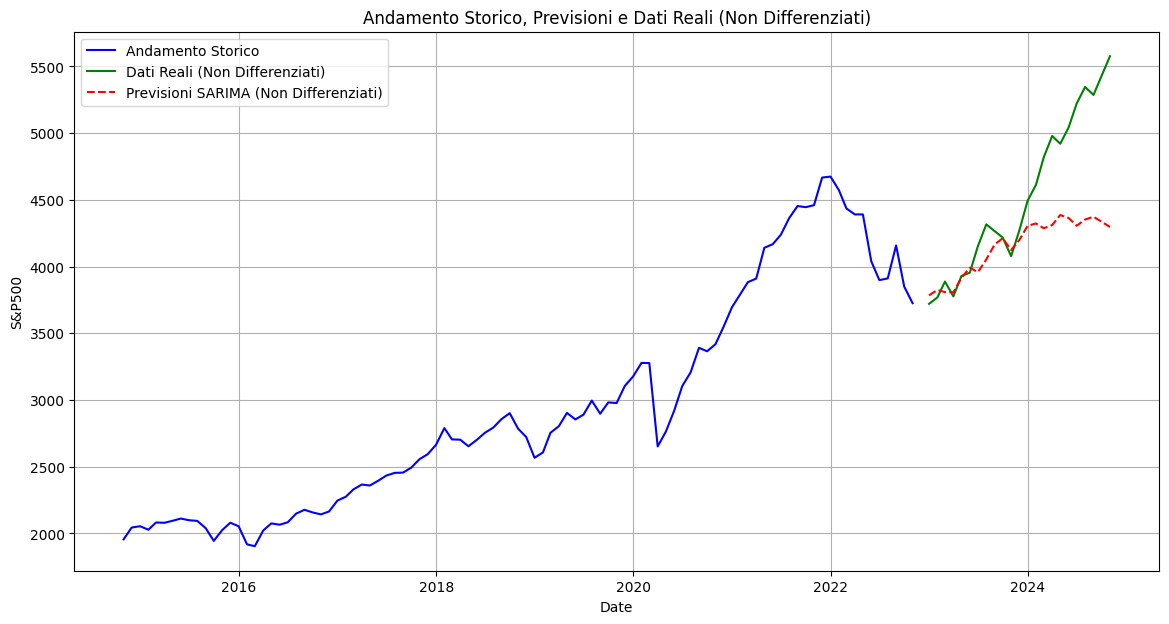

In [39]:
# Recupero il valore iniziale dal dataset originale
last_original_value = train_data['S&P500'].iloc[-1]

# Integrazione delle previsioni differenziate
y_pred_integrated = y_pred.cumsum() + last_original_value

# Integrazione dei dati reali differenziati (y_true)
y_true_integrated = y_true.cumsum() + last_original_value

# Aggiunta indice temporale
y_pred_integrated.index = test_data['Date']
y_true_integrated.index = test_data['Date']

# Concatenamnto dei dati storici con le previsioni integrate
historical_data = train_data[['Date', 'S&P500']].set_index('Date')
historical_and_predicted = pd.concat([historical_data, y_pred_integrated], axis=0)

# Creazione del grafico per l'intero andamento
plt.figure(figsize=(14, 7))

# Dati storici originali
plt.plot(historical_data, label='Andamento Storico', color='blue')

# Dati reali ricostruiti (non differenziati)
plt.plot(y_true_integrated, label='Dati Reali (Non Differenziati)', color='green')

# Previsioni ricostruite (non differenziate)
plt.plot(y_pred_integrated, label='Previsioni SARIMA (Non Differenziati)', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('S&P500')
plt.title('Andamento Storico, Previsioni e Dati Reali (Non Differenziati)')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
# Calcolo degli indicatori di valutazione
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Stampa degli indicatori di valutazione
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"R²: {r2:.4f}")

Mean Absolute Error (MAE): 120.5296
Mean Squared Error (MSE): 18471.7846
Root Mean Squared Error (RMSE): 135.9109
Mean Absolute Percentage Error (MAPE): 1.6317
R²: -0.5420


In [ ]:
# Previsione dei residui
residuals = results.resid

# Test di Ljung-Box sui residui
lb_test = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print("Risultati del test di Ljung-Box:")
print(lb_test)

Risultati del test di Ljung-Box:
      lb_stat  lb_pvalue
10   3.730341   0.958693
20  14.398285   0.809742
30  19.926756   0.918435
